Analyser les ventes d'une librairie avec R ou Python

In [1]:
# On importe les librairies utiles au projet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# On importe les fichiers CSV dans lesquels se trouvent nos bases de données

products = pd.read_csv("C:/Livrables/DAN-P6-donnees/products.csv")
customers = pd.read_csv("C:/Livrables/DAN-P6-donnees/customers.csv")
transactions = pd.read_csv("C:/Livrables/DAN-P6-donnees/transactions.csv")

In [3]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


# 1. Constitution de notre de base de données complète

## 1.1 Nettoyage de données

In [9]:
transactions = transactions[transactions.session_id	 != "s_0"]

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


## 1.2 Merging


In [11]:
# Je modifie mon merge et le met en "right join" afin de ne pas exclure des valeurs manquantes. 
global_ = pd.merge(products, transactions, how="right", on="id_prod")

In [12]:
global_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   date        679332 non-null  object 
 4   session_id  679332 non-null  object 
 5   client_id   679332 non-null  object 
dtypes: float64(2), object(4)
memory usage: 36.3+ MB


In [13]:
#Je sauvegarde les données dont le prix et la catégorie manquent dans une variable.
transactions_null = global_[global_["price"].isnull()]

In [14]:
global_final = pd.merge(global_, customers, on="client_id")

## 1.3 Nettoyage des données après merge 

In [15]:
global_final['date'] = pd.to_datetime(global_final['date'])

In [16]:
global_final[global_final['date'].dt.month != 10] 

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1518,4.18,0.0,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,3.99,0.0,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,13.21,0.0,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,19.37,0.0,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,8.99,0.0,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986
...,...,...,...,...,...,...,...,...
679326,0_1509,4.99,0.0,2022-08-15 08:17:35.835342,s_253539,c_8114,m,1962
679327,0_1509,4.99,0.0,2021-05-15 08:17:35.835342,s_34762,c_8114,m,1962
679328,1_152,11.06,1.0,2021-11-08 17:12:27.637349,s_116675,c_240,m,1998
679329,2_207,50.99,2.0,2021-06-01 04:31:16.088314,s_42418,c_305,f,1996


In [17]:
global_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB


In [18]:
global_final.set_index('date', inplace=True)
global_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679332 entries, 2022-05-20 13:21:29.043970 to 2021-12-18 00:38:49.629165
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   session_id  679332 non-null  object 
 4   client_id   679332 non-null  object 
 5   sex         679332 non-null  object 
 6   birth       679332 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 41.5+ MB


In [19]:
global_final = global_final.drop(global_final.index[global_final.index.year.isin([2021])] & global_final.index[global_final.index.month.isin([10])])

<ipython-input-19-c54d94c39dfd>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  global_final = global_final.drop(global_final.index[global_final.index.year.isin([2021])] & global_final.index[global_final.index.month.isin([10])])


In [20]:
global_final = global_final.reset_index()

# 2. Extraction de données et visualisation graphique

## 2.1 Courbe de l'évolution du chiffre d'affaire

In [21]:
chiffre_daffaire = global_final.groupby([pd.Grouper(key ='date', freq='W')]).price.sum()

In [22]:
chiffre_daffaire

date
2021-03-07    110463.28
2021-03-14    105693.24
2021-03-21    112059.08
2021-03-28    109441.07
2021-04-04    107895.66
                ...    
2023-02-05    113486.13
2023-02-12    112528.15
2023-02-19    114121.61
2023-02-26    112245.15
2023-03-05     37275.96
Freq: W-SUN, Name: price, Length: 105, dtype: float64

In [23]:
MA = chiffre_daffaire.rolling(window=4, min_periods=1).mean()

<AxesSubplot:xlabel='date'>

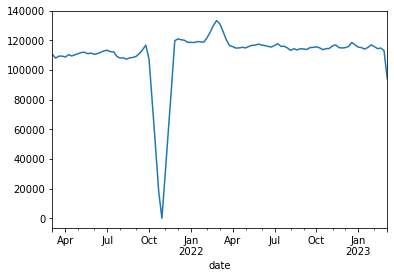

In [24]:
MA.plot()

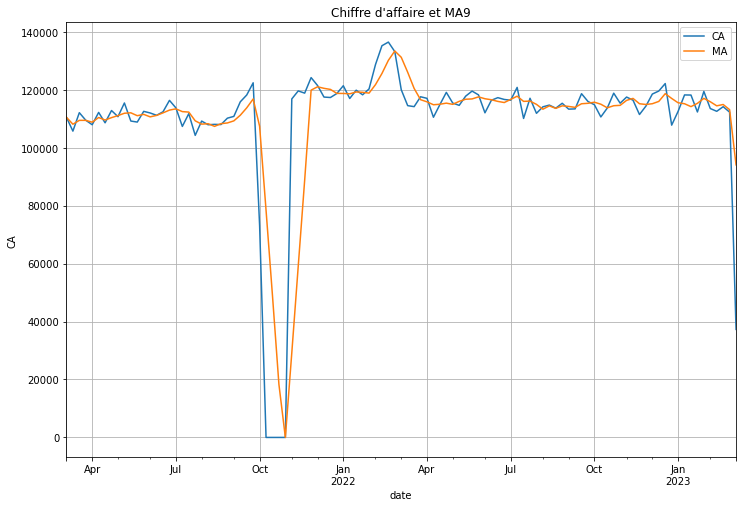

In [25]:
plt.figure(figsize=(12,8))
chiffre_daffaire.plot(label='CA')
MA.plot(label='MA')
plt.title("Chiffre d'affaire et MA9")
plt.ylabel('CA')
plt.legend()
plt.grid(True)
plt.show()

## 2.2 Statistiques sur le chiffre d'affaire 

#### 2.2.1 Chiffre d'affaire au total

In [26]:
CA_total = global_final["price"].sum()

In [27]:
CA_total

11532929.940000007

In [28]:
# Je note que des outliers doivent être supprimés.

rank_client = global_final.groupby("client_id").price.sum().reset_index()

In [29]:
rank_client_sorted = rank_client.sort_values(by="price",ascending=False).head(10)

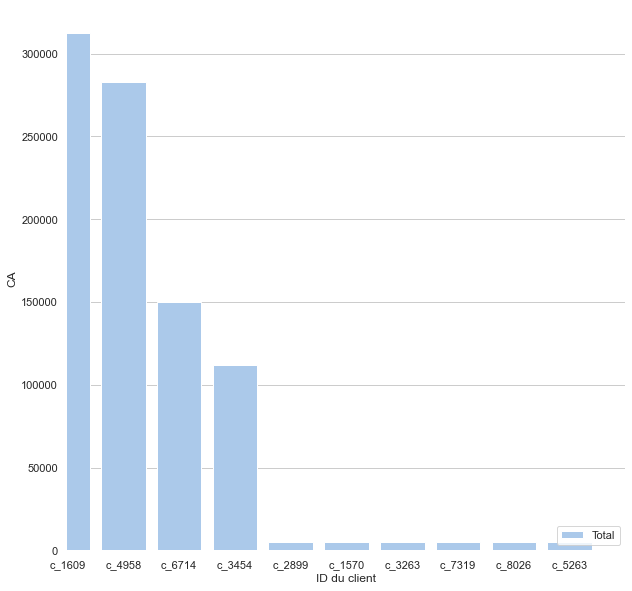

In [30]:
sns.set_theme(style="whitegrid")


f, ax = plt.subplots(figsize=(10, 10))


sns.set_color_codes("pastel")
sns.barplot(x="client_id", y="price", data=rank_client_sorted,
            label="Total", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="CA",
       xlabel="ID du client")
sns.despine(left=True, bottom=True)

In [31]:
# J'exclue les données des clients-outliers après mon CA global et avant mes opérations sur les données. 

global_final = global_final[global_final['client_id'] != "c_1609"] 
global_final = global_final[global_final['client_id'] != "c_4958"]
global_final = global_final[global_final['client_id'] != "c_6714"]
global_final = global_final[global_final['client_id'] != "c_3454"]

In [32]:
#Je vérifie que mes données ont bien été supprimées.

global_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612626 entries, 0 to 657725
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        612626 non-null  datetime64[ns]
 1   id_prod     612626 non-null  object        
 2   price       612421 non-null  float64       
 3   categ       612421 non-null  float64       
 4   session_id  612626 non-null  object        
 5   client_id   612626 non-null  object        
 6   sex         612626 non-null  object        
 7   birth       612626 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 42.1+ MB


#### 2.2.2 Répartition du chiffre d'affaire selon prix

In [33]:
CA_10 = global_final[global_final["price"] <10]

In [34]:
print("Le chiffre d'affaire des livres de moins de 10€ est de:",round(CA_10.price.sum()/CA_total*100,2), "%")

Le chiffre d'affaire des livres de moins de 10€ est de: 10.9 %


In [35]:
CA_10_25 = global_final[global_final["price"].between(10, 25)]

In [36]:
print("Le chiffre d'affaire des livres entre 10€ et 25€ est de:",round(CA_10_25.price.sum()/CA_total*100,2), "%")

Le chiffre d'affaire des livres entre 10€ et 25€ est de: 47.95 %


In [37]:
CA_25_100 = global_final[global_final["price"].between(25, 100)]

In [38]:
print("Le chiffre d'affaire des livres entre 25€ et 100€ est de:",round(CA_25_100.price.sum()/CA_total*100,2), "%")

Le chiffre d'affaire des livres entre 25€ et 100€ est de: 26.01 %


In [39]:
CA_100 = global_final[global_final["price"] >100]

In [40]:
print("Le chiffre d'affaire des livres de plus de 100€ est de:",round(CA_100.price.sum()/CA_total*100,2), "%")

Le chiffre d'affaire des livres de plus de 100€ est de: 7.71 %


In [41]:
global_final.groupby("id_prod")

In [42]:
bins = [-1, 10, 25, 100, np.inf]
labels=['0-10', '10-25', '25-100', 'more than 100']
df=global_final.groupby(pd.cut(global_final['price'], bins=bins, labels=labels)).size().reset_index(name="ventes")
print (df)

           price  ventes
0           0-10  192368
1          10-25  340084
2         25-100   73906
3  more than 100    6063


In [43]:
bins = [-1, 10, 25, 100, np.inf]
labels=['0-10', '10-25', '25-100', 'more than 100']
df=global_final.groupby(pd.cut(global_final['price'], bins=bins, labels=labels)).sum()/CA_total*100
print (df)

                   price     categ        birth
price                                          
0-10           10.948172  0.035316  3299.480193
10-25          47.899470  1.382823  5827.770970
25-100         26.008735  0.855446  1270.098542
more than 100   7.713073  0.105142   104.878787


In [44]:
bins = [-1, 10, 25, 100, np.inf]
labels=['0-10', '10-25', '25-100', 'more than 100']
df=global_final.groupby(pd.cut(global_final['price'], bins=bins, labels=labels)).size().reset_index(name="ventes")
print (df)

           price  ventes
0           0-10  192368
1          10-25  340084
2         25-100   73906
3  more than 100    6063


([<matplotlib.patches.Wedge at 0x1fa22e909a0>,
 [Text(5.212982535097152, 5.835394608673919, '192368'),
  Text(2.155673842541618, 2.8006414110388835, '340084'),
  Text(5.989208997145466, 3.0602938939883755, '73906'),
  Text(6.198936017848652, 3.9315866284421395, '6063')])

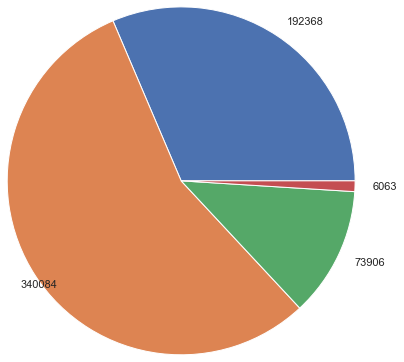

In [45]:
plt.pie(df["ventes"], labels=df.ventes, radius=2, center=(4, 4))

In [46]:
bins = [-1, 10, 25, 100, np.inf]
labels=['0-10', '10-25', '25-100', 'more than 100']
dfg=round(global_final.groupby(pd.cut(global_final['price'], bins=bins, labels=labels)).sum()/CA_total*100,2)
print (dfg)

               price  categ    birth
price                               
0-10           10.95   0.04  3299.48
10-25          47.90   1.38  5827.77
25-100         26.01   0.86  1270.10
more than 100   7.71   0.11   104.88


([<matplotlib.patches.Wedge at 0x1fa22ee7790>,
 [Text(6.049832336668368, 4.798866316443933, '10.95'),
  Text(2.4248239378197445, 5.535845165742401, '47.9'),
  Text(4.360848642929451, 1.8297953421633308, '26.01'),
  Text(6.1251173987172525, 3.4308989178808225, '7.71')])

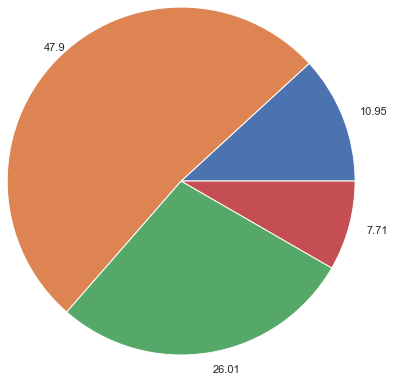

In [47]:
plt.pie(dfg.price, labels=dfg.price, radius=2, center=(4, 4))

#### 2.2.3 Visualisation du chiffre d'affaire par produit 

In [48]:
ca_par_produit = global_final.groupby("id_prod").price.sum().reset_index()

In [49]:
ca_par_produit

,id_prod,price
0,0_0,4128.75
1,0_1,4934.51
2,0_10,287.20
3,0_100,61.80
4,0_1000,2558.16
...,...,...
3253,2_95,395.96
3254,2_96,25679.76
3255,2_97,1770.89
3256,2_98,149.74


<Figure size 432x288 with 0 Axes>

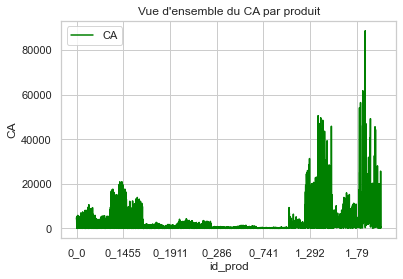

In [50]:
plt.figure()

df = pd.DataFrame(ca_par_produit,columns=['id_prod','price'])
df.plot(x ='id_prod', y='price', label='CA', c="green")
plt.title("Vue d'ensemble du CA par produit")
plt.ylabel('CA')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
ca_par_produit_sorted = ca_par_produit.sort_values(by="price", ascending=False).head(10)

In [52]:
ca_par_produit_sorted_2 = ca_par_produit.sort_values(by="price").head(10)

In [53]:
ca_par_produit_sorted_2

,id_prod,price
1370,0_2245,0.00
209,0_1191,0.99
593,0_1539,0.99
2173,0_898,1.27
312,0_1284,1.38
717,0_1653,1.98
1892,0_643,1.98
955,0_1871,1.99
663,0_1601,1.99
2073,0_807,1.99


## 2.3 Courbe de Lorenz du chiffre d'affaire par produit

<Figure size 432x288 with 0 Axes>

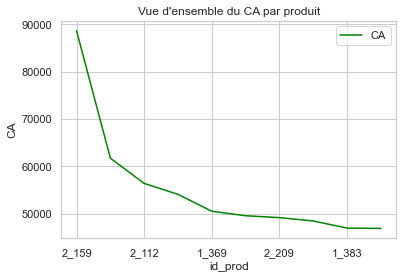

In [54]:
plt.figure()

df = pd.DataFrame(ca_par_produit_sorted,columns=['id_prod','price'])
df.plot(x ='id_prod', y='price', label='CA', c="green")
plt.title("Vue d'ensemble du CA par produit")
plt.ylabel('CA')
plt.legend()
plt.grid(True)
plt.show()

## 2.4 Produits les mieux vendus

Classification des produits qui se vendent le mieux et le moins bien

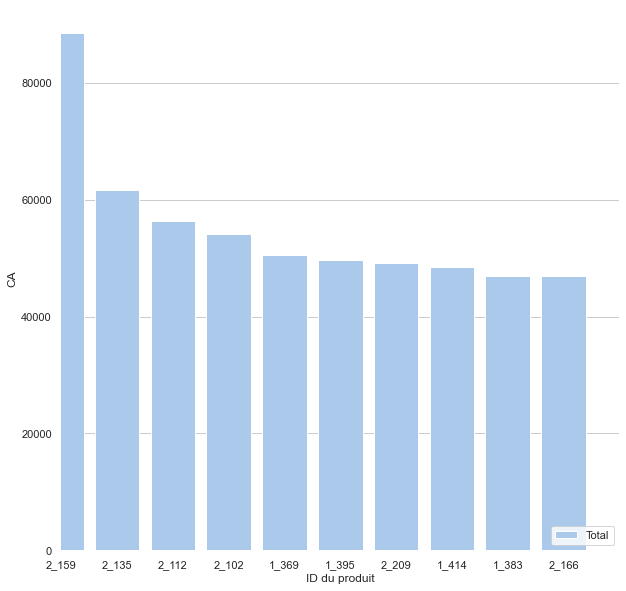

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


f, ax = plt.subplots(figsize=(10,10))


sns.set_color_codes("pastel")
sns.barplot(x="id_prod", y="price", data=ca_par_produit_sorted,
            label="Total", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="CA",
       xlabel="ID du produit")
sns.despine(left=True, bottom=True)

## 2.5 Produits les moins vendus

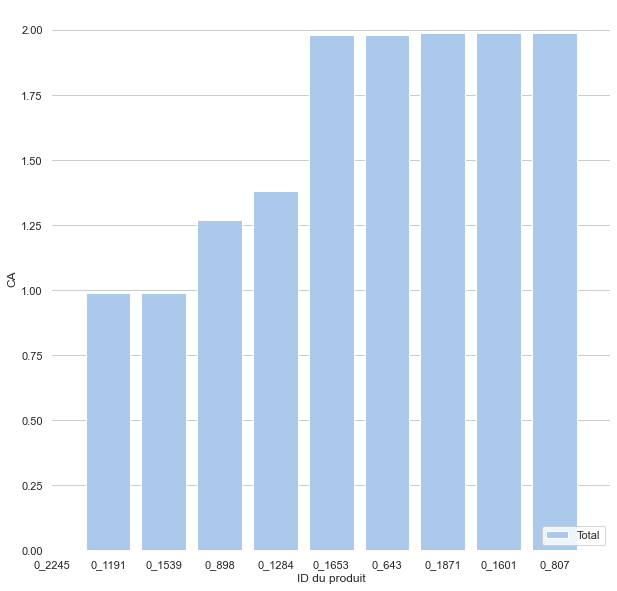

In [56]:
sns.set_theme(style="whitegrid")


f, ax = plt.subplots(figsize=(10, 10))


sns.set_color_codes("pastel")
sns.barplot(x="id_prod", y="price", data=ca_par_produit_sorted_2,
            label="Total", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="CA",
       xlabel="ID du produit")
sns.despine(left=True, bottom=True)

# 3. Liens entre différentes variables (graphiques)

## 3.1 Lien entre genre et catégorie de livre achetée

In [57]:
genre = global_final.groupby(["sex"]).count()

Text(0.5, 1.0, 'Répartition des ventes par sexe')

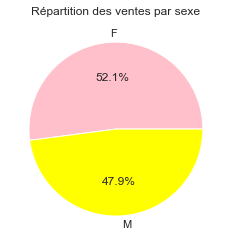

In [58]:
plt.pie(genre.id_prod,radius=1, center=(4, 4),labels = ["F", "M"], colors = ['pink', "yellow"], autopct = lambda genre: str(round(genre, 1)) + '%')
plt.title("Répartition des ventes par sexe")

In [59]:
ages = global_final["birth"].sort_values(ascending = True)

In [60]:
ca_clients = global_final.groupby("client_id").price.sum()

In [61]:
categ_femme = global_final.loc[global_final['sex'] == "f",:].groupby("categ").size()

In [62]:
categ_homme = global_final.loc[global_final['sex'] == "m",:].groupby("categ").size()

In [63]:
categ_femme.reset_index()

,categ,0
0,0.0,191919
1,1.0,110550
2,2.0,16429


In [64]:
categ_homme.reset_index()

,categ,0
0,0.0,177945
1,1.0,100227
2,2.0,15351


Text(0.5, 1.0, 'Répartition des ventes par catégorie pour les hommes')

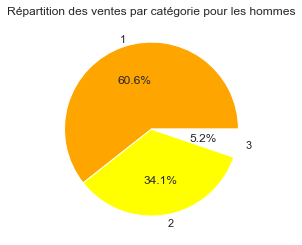

In [65]:
plt.pie(categ_homme,radius=1, center=(4, 4), labels = ["1", "2", "3"], colors = ['orange', "yellow", "white"], autopct = lambda categ_homme: str(round(categ_homme, 1)) + '%')
plt.title("Répartition des ventes par catégorie pour les hommes")

Text(0.5, 1.0, 'Répartition des ventes par catégorie pour les femmes')

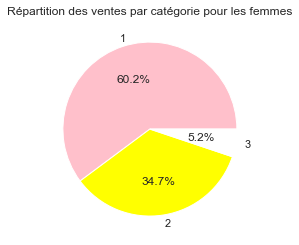

In [66]:
plt.pie(categ_femme, radius=1, center=(4, 4), labels = ["1", "2", "3"], colors = ['pink', "yellow", "white"], autopct = lambda categ_femme: str(round(categ_femme, 1)) + '%')
plt.title("Répartition des ventes par catégorie pour les femmes")

## 3.2 Lien entre âge et chiffre d'affaire

In [67]:
age_total = global_final.groupby(["birth"]).sum()

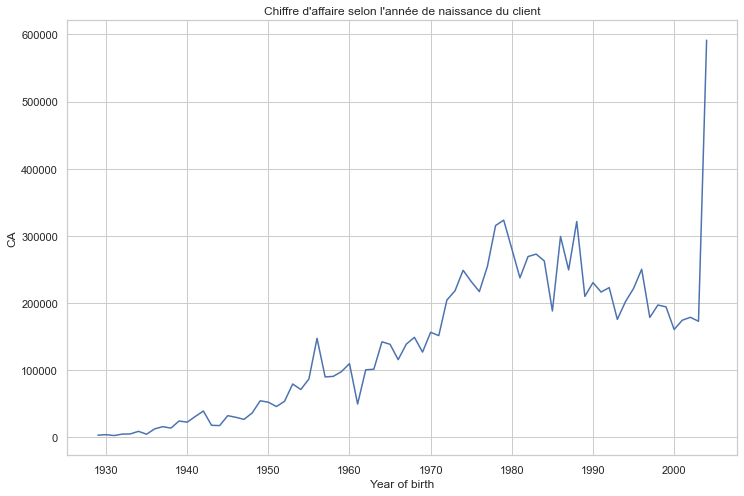

In [68]:
plt.figure(figsize=(12,8))
age_total["price"].plot()
plt.xlabel('Year of birth')
plt.ylabel('CA')
plt.title("Chiffre d'affaire selon l'année de naissance du client")
plt.grid(True)

## 3.2 Lien entre âge et fréquence d'achat

In [69]:
age_frequence = global_final.groupby(["birth"]).size()

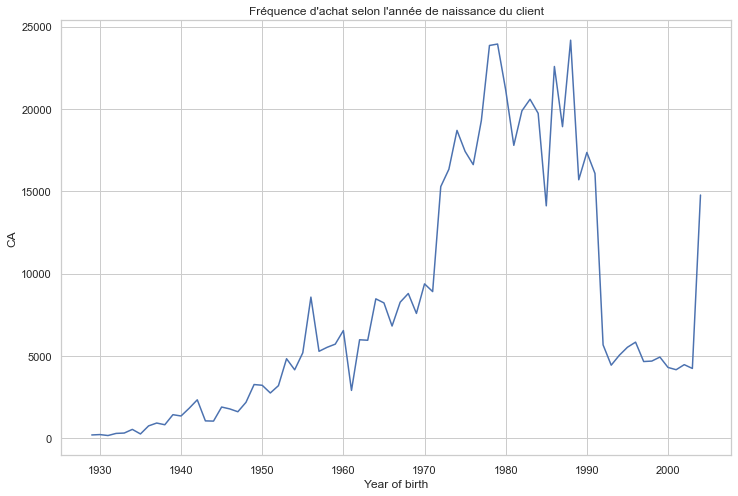

In [70]:
plt.figure(figsize=(12,8))
age_frequence.plot()
plt.xlabel('Year of birth')
plt.ylabel('CA')
plt.title("Fréquence d'achat selon l'année de naissance du client")
plt.grid(True)

## 3.3 Lien entre âge et panier moyen

In [71]:
age_mean = global_final.groupby(["birth"]).mean()

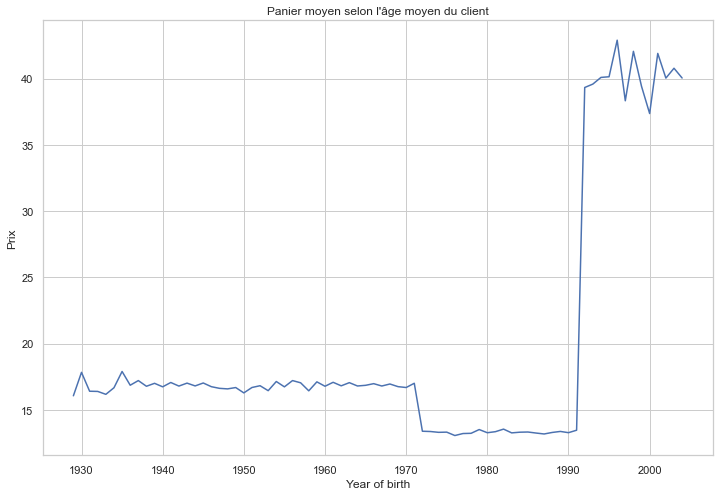

In [72]:
plt.figure(figsize=(12,8))
age_mean["price"].plot()
plt.xlabel('Year of birth')
plt.ylabel('Prix')
plt.title("Panier moyen selon l'âge moyen du client")
plt.grid(True)


## 3.4 Lien entre âge et catégorie de livre acheté

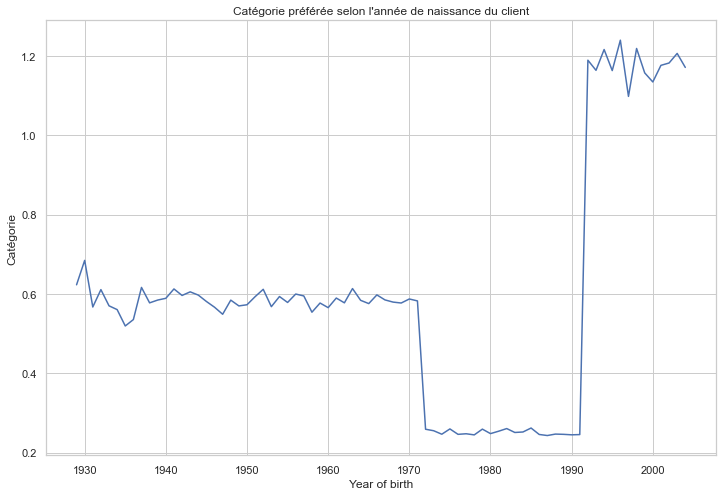

In [73]:
plt.figure(figsize=(12,8))

age_mean["categ"].plot()
plt.xlabel('Year of birth')
plt.ylabel('Catégorie')

plt.title("Catégorie préférée selon l'année de naissance du client")
plt.grid(True)


In [74]:
categ_plot = global_final.groupby("client_id").sum()

In [75]:
categ_plot.head()

,price,categ,birth
client_id,,,
c_1,550.19,10.0,74290
c_10,1353.60,42.0,113448
c_100,254.85,7.0,15936
c_1000,2209.92,80.0,239852
c_1001,1720.08,33.0,190272


In [76]:
categ_0 = global_final.loc[global_final["categ"]==0]

In [77]:
categ_1 = global_final.loc[global_final["categ"]==1]

In [78]:
categ_2 = global_final.loc[global_final["categ"]==2]

In [79]:
categ_0_stacked = categ_0.groupby([pd.Grouper(key ='date', freq='M')]).price.sum()

<AxesSubplot:xlabel='date'>

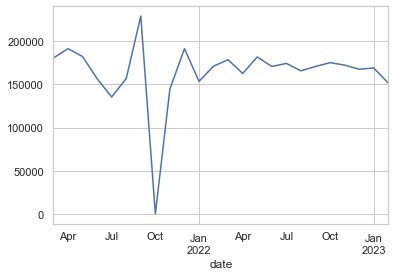

In [80]:
categ_0_stacked.plot()

In [81]:
categ_1_stacked = categ_1.groupby([pd.Grouper(key ='date', freq='M')]).price.sum()

In [82]:
categ_2_stacked = categ_2.groupby([pd.Grouper(key ='date', freq='M')]).price.sum()

<AxesSubplot:xlabel='date'>

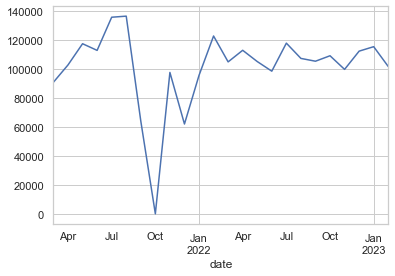

In [83]:
categ_2_stacked.plot()

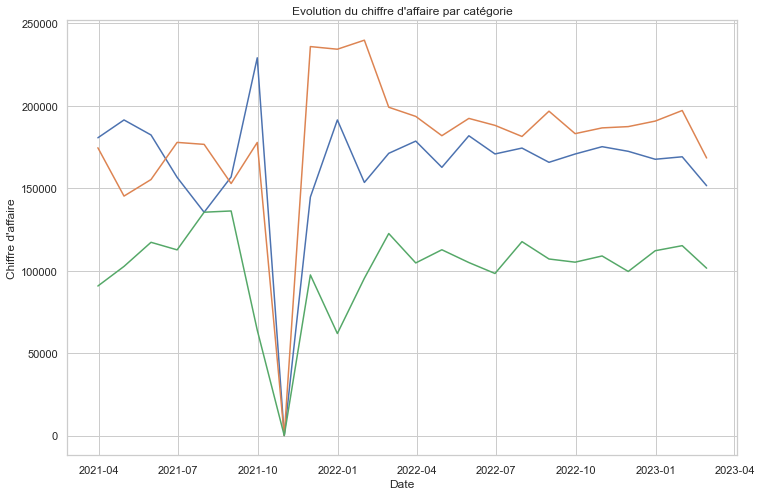

In [84]:
plt.figure(figsize=(12,8))
plt.plot(categ_0_stacked)
plt.plot(categ_1_stacked)
plt.plot(categ_2_stacked)

plt.xlabel('Date')
plt.ylabel("Chiffre d'affaire")

plt.title("Evolution du chiffre d'affaire par catégorie")
plt.grid(True)


In [85]:
categ_stacked = global_final.groupby([pd.Grouper(key ='date', freq='M')]).price.sum()

<AxesSubplot:xlabel='date'>

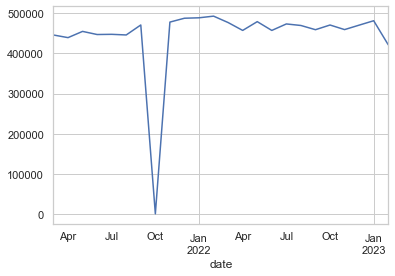

In [86]:
categ_stacked.plot()

In [87]:
age_1 = global_final[global_final["birth"] <1970]

In [88]:
age_1 = age_1.groupby('categ').size()

<AxesSubplot:xlabel='categ'>

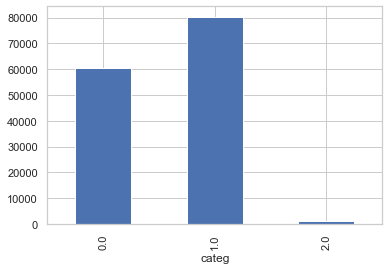

In [89]:
age_1.plot(kind='bar')

In [90]:
age_2 = global_final[global_final["birth"].between(1970, 1990)]

In [91]:
age_2 = age_2.groupby('categ').size()

<AxesSubplot:xlabel='categ'>

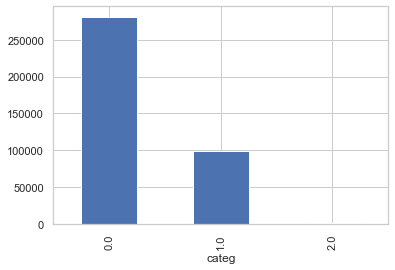

In [92]:
age_2.plot(kind='bar')

In [93]:
age_3 = global_final[global_final["birth"] >1990]

In [94]:
age_3 = age_3.groupby('categ').size()

<AxesSubplot:xlabel='categ'>

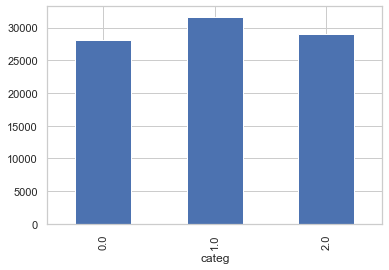

In [95]:
age_3.plot(kind='bar')

# 4. Liens entre différentes variables (stats)

## 4.1 Corrélation entre âge et genre 

In [96]:
client1 = global_final.groupby("client_id").head(10)

In [97]:
client1

,date,id_prod,price,categ,session_id,client_id,sex,birth
0,2022-05-20 13:21:29.043970,0_1518,4.18,0.0,s_211425,c_103,f,1986
1,2022-06-18 05:55:31.816994,0_1627,3.99,0.0,s_225494,c_103,f,1986
2,2023-02-08 17:31:06.898425,0_1104,13.21,0.0,s_338755,c_103,f,1986
3,2021-04-20 06:18:39.939761,0_1390,19.37,0.0,s_23078,c_103,f,1986
4,2022-03-15 19:54:53.904123,0_1547,8.99,0.0,s_179629,c_103,f,1986
...,...,...,...,...,...,...,...,...
657721,2021-05-15 08:17:35.835342,0_1509,4.99,0.0,s_34762,c_8114,m,1962
657722,2021-11-08 17:12:27.637349,1_152,11.06,1.0,s_116675,c_240,m,1998
657723,2021-06-01 04:31:16.088314,2_207,50.99,2.0,s_42418,c_305,f,1996
657724,2022-10-18 00:38:49.629165,1_521,22.99,1.0,s_284060,c_305,f,1996


In [98]:
X = global_final["sex"]
Y = global_final["categ"]
data = {
    'sex':X,
    'categ':Y
}
df = pd.DataFrame(data)

In [99]:
df

,sex,categ
0,f,0.0
1,f,0.0
2,f,0.0
3,f,0.0
4,f,0.0
...,...,...
657721,m,0.0
657722,m,1.0
657723,f,2.0
657724,f,1.0


In [100]:
X = "sex"
Y = "categ"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()

tx = df[X].value_counts()
ty = df[Y].value_counts()

cont = cont.astype(int)

In [101]:
cont

categ,0.0,1.0,2.0
sex,,,
f,191919,110550,16429
m,177945,100227,15351


In [102]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [103]:
st_p

8.48311292992366e-05

## 4.2 Corrélation entre âge et prix 

In [104]:
test_kama_mean = global_final.groupby(['birth']).price.mean().reset_index()

In [105]:
from scipy.stats import pearsonr

pearson, _ = pearsonr(test_kama_mean.birth, test_kama_mean.price)

In [106]:
pearson

0.5463996351853169

In [107]:
# Il y a une corrélation positive entre les deux variables, mais elle n'est pas totale